In [1]:
%pip install transformer_lens
%pip install circuitsvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
 

In [2]:
import torch
torch.set_grad_enabled(False)

In [3]:
from transformer_lens import HookedTransformer
import transformer_lens.utils as utils
device = utils.get_device()

model = HookedTransformer.from_pretrained(
    "gpt2-xl",
    device=device,
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loaded pretrained model gpt2-xl into HookedTransformer


In [ ]:
import torch
for layer in model.blocks:
    layer.ln1 = torch.nn.Identity()
    layer.ln2 = torch.nn.Identity()

In [4]:
model

HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-47): 48 x TransformerBlock(
      (ln1): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (h

In [ ]:
model.cfg.n_layers

36

In [5]:
import json
import typing
from pathlib import Path

import torch
from torch.utils.data import Dataset

REMOTE_URL = f"https://rome.baulab.info/data/dsets/known_1000.json"


class KnownsDataset(Dataset):
    def __init__(self, data_dir: str, *args, **kwargs):
        data_dir = Path(data_dir)
        known_loc = data_dir / "known_1000.json"
        if not known_loc.exists():
            print(f"{known_loc} does not exist. Downloading from {REMOTE_URL}")
            data_dir.mkdir(exist_ok=True, parents=True)
            torch.hub.download_url_to_file(REMOTE_URL, known_loc)

        with open(known_loc, "r") as f:
            self.data = json.load(f)

        print(f"Loaded dataset with {len(self)} elements")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        return self.data[item]

In [6]:
known_facts = KnownsDataset('data')

data/known_1000.json does not exist. Downloading from https://rome.baulab.info/data/dsets/known_1000.json


100%|██████████| 335k/335k [00:00<00:00, 404kB/s]

Loaded dataset with 1209 elements


In [7]:
def predict_next_word(logits):
  top_token_id = logits.argmax().item()
  top_token = model.to_string(top_token_id)
  return top_token,logits[top_token_id].item()

In [8]:
import math
def find_correct_probability(logits,attribute):
   answer_token = model.to_single_token(attribute)
   return logits[answer_token]
  #  if(log==False):
  #     total_prob = 1
  #     for prob in answer_token:
  #        total_prob *= logits[prob].item()
  #     return total_prob
  #  total_log_prob = 0
  #  for prob in answer_token:
  #     total_log_prob += math.log(logits[prob].item())
  #  return total_log_prob


In [9]:
def get_std_embeddings(known_facts):
   subject_vectors = []
   for fact in known_facts:
      tokens = model.to_tokens(fact['subject'],prepend_bos=True)
      cache = model.run_with_cache(tokens,remove_batch_dim=True,stop_at_layer=0)
      subject_vectors.append(cache[0][0])

   subject_vectors = torch.cat(subject_vectors,dim=0)
   std = subject_vectors.std().item()
   return std



In [10]:
noise_dataset= get_std_embeddings(known_facts)


In [11]:
noise_level = 3 * noise_dataset

In [12]:
def find_subject_token_range(token_array, substring):
    toks = model.to_str_tokens(token_array)
    whole_string = "".join(toks)
    char_loc = whole_string.index(substring)
    loc = 0
    tok_start, tok_end = None, None
    for i, t in enumerate(toks):
        loc += len(t)
        if tok_start is None and loc > char_loc:
            tok_start = i
        if tok_end is None and loc >= char_loc + len(substring):
            tok_end = i + 1
            break
    return (tok_start, tok_end)

find_subject_token_range(model.to_tokens('My name is soham'),'soham')

(4, 6)

In [13]:
import matplotlib.pyplot as plt

def plot_trace_heatmap(matrix, token_labels,  next_word,min_prob,subj_range,color=None,title=None):
    if color is None:
        color = "Purples"
    token_labels = token_labels.copy()  # Avoid mutating the original
    start, end = subj_range
    for i in range(start-1, end-1):
        token_labels[i] = token_labels[i] + '*'

    plt.figure(figsize=(12, 5))
    plt.imshow(matrix, aspect='auto', cmap=color,vmin=0,vmax=1)
    plt.colorbar(label=f'p({next_word})')
    plt.yticks(range(len(token_labels)), token_labels)
    plt.xticks(range(matrix.shape[1]), list(range(matrix.shape[1])))
    if title:
        plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel("Token")
    plt.tight_layout()
    plt.show()


In [14]:
def add_noise_hook(value,hook,subj_pos=None):
    s_pos,end_pos = subj_pos
    noise = torch.randn(value.shape[0] - 1, end_pos - s_pos, value.shape[2]) * noise_level
    noise = noise.to(value.device)
    if subj_pos is None:
       value[1:,:] += noise
    else:
       value[1:,s_pos:end_pos] += noise
    return value

In [15]:
def replace_correct_activaton(value,hook,token_no):
  value[1:,token_no] = value[0,token_no]
  return value

In [16]:
from functools import partial

def trace_important_window_tflens(input_tokens,subj_index,correct_next_word, window=10, kind="resid_pre",):
    # prompts = [fact['prompt']] * samples
    # input_tokens = model.to_tokens(prompts, prepend_bos=True)

    # subj_index = find_subject_token_range(input_tokens[0], fact['subject'])
    # s_tok, e_tok = subj_index

    # # Clean run
    # clean_run = model(input_tokens, return_type='logits')
    # clean_logits = clean_run[:, -1]
    # clean_logits = torch.softmax(clean_logits, dim=1).mean(dim=0)
    # correct_next_word,max_prob = predict_next_word(clean_logits)

    # # Corrupted run (noise only)
    # corrupted_run = model.run_with_hooks(
    #     input_tokens, return_type='logits',
    #     fwd_hooks=[(utils.get_act_name('embed'), temp_noise_hook_fn)]
    # )
    # corrupted_logits = corrupted_run[1:, -1]
    # corrupted_logits = torch.softmax(corrupted_logits, dim=1).mean(dim=0)
    # min_prob = find_correct_probability(corrupted_logits, correct_next_word)

    table = []
    num_layers = model.cfg.n_layers
    temp_noise_hook_fn = partial(add_noise_hook, subj_pos=subj_index)

    for tok in range(len(input_tokens[0])):
        if tok == 0:
          continue
        row = []
        for center_layer in range(num_layers):
            # Build list of layers in window
            window_layers = range(
                max(0, center_layer - window // 2),
                min(num_layers, center_layer + window // 2 + 1)
            )

            # Create hook list for all layers in the window
            fwd_hooks = [(utils.get_act_name('embed'), temp_noise_hook_fn)]
            for L in window_layers:
                hook_name = ""
                if kind == "mlp":
                    hook_name = utils.get_act_name("mlp_out", L)
                elif kind == "attn":
                    hook_name = utils.get_act_name("attn_out", L)
                elif kind == "resid":
                    hook_name = utils.get_act_name("resid_pre", L)
                else:
                   raise ValueError(f"Unknown kind {kind}")
                fwd_hooks.append((
                    hook_name,
                    partial(replace_correct_activaton, token_no=tok)
                ))

            run = model.run_with_hooks(
                input_tokens,
                return_type='logits',
                fwd_hooks=fwd_hooks
            )
            logits = run[:, -1]
            logits = torch.softmax(logits, dim=1).mean(dim=0)
            score = find_correct_probability(logits, correct_next_word)
            row.append(score)
        table.append(torch.stack(row))

    table = torch.stack(table)
    return table


In [17]:
from functools import partial

def trace_important_states(fact):
    # first prompt for clean run and the rest will be corrupted ones
    prompts = [fact['prompt'] for _ in range(11)]

    input_tokens = model.to_tokens(prompts,prepend_bos=True)
    print(input_tokens[0])
    print(model.to_str_tokens(input_tokens[0]))
    subj_index = find_subject_token_range(input_tokens[0],fact['subject'])
    s_tok, e_tok = subj_index
    print(s_tok,e_tok)

    #Clean run to get the maximum score of prob
    clean_run = model(input_tokens,return_type='logits')
    clean_logits = clean_run[:,-1]
    clean_logits = torch.softmax(clean_logits,dim=1).mean(dim=0)
    correct_next_word,max_prob = predict_next_word(clean_logits)
    print(max_prob)

    #Corrupted run to get minimum score of prob
    temp_hook_fn = partial(add_noise_hook,subj_pos = subj_index )
    corrupted_run = model.run_with_hooks(input_tokens,return_type='logits',fwd_hooks=[(utils.get_act_name('embed'),temp_hook_fn)])
    corrupted_logits = corrupted_run[1:,-1]
    corrupted_logits = torch.softmax(corrupted_logits,dim=1).mean(dim=0)
    min_prob = find_correct_probability(corrupted_logits,correct_next_word)
    # incorrect_next_word,min_prob = predict_next_word(corrupted_logits)
    print(min_prob)


    #Replace the activations at each (subj_token, layer) pair and store the results
    table = []
    for tok in range(len(input_tokens[0])):
       if tok == 0:
        continue
       temp_noise_hook_fn = partial(add_noise_hook,subj_pos = subj_index )
       temp_hook_fn = partial(replace_correct_activaton,token_no = tok)
       row =[]
       for layer in range(model.cfg.n_layers):
          run = model.run_with_hooks(input_tokens,return_type='logits',fwd_hooks=[(utils.get_act_name('embed'),temp_noise_hook_fn),(utils.get_act_name("resid_pre", layer), temp_hook_fn)])
          logits = run[1:,-1]
          logits = torch.softmax(logits,dim=1).mean(dim=0)
          score = find_correct_probability(logits,correct_next_word)
          row.append(score)
       table.append(torch.stack(row))

    resid_table = torch.stack(table)
    mlp_table = trace_important_window_tflens(input_tokens,subj_index,correct_next_word,kind='mlp')
    attn_table = trace_important_window_tflens(input_tokens,subj_index,correct_next_word,kind='attn')
    return {
        'resid_table': resid_table,
        'mlp_table': mlp_table,
        'attn_table': attn_table,
        'max_prob': max_prob,
        'min_prob': min_prob,
        'correct_next_word': correct_next_word,
    }


In [50]:
def compare_plots(fact):
  result = trace_important_states(fact)
  scores = result['resid_table'].detach().cpu()
  next_word = result['correct_next_word']
  low_score = result['min_prob']
  subj_index = find_subject_token_range(model.to_tokens(fact['prompt'],prepend_bos=True),fact['subject'])
  labels = model.to_str_tokens(fact['prompt'])[1:]
  print(scores)
  plot_trace_heatmap(scores, labels,next_word,low_score,subj_index, title="Impact of restoring Hidden States")

  scores = result['mlp_table'].detach().cpu()
  print(scores)
  plot_trace_heatmap(scores, labels,next_word,low_score,subj_index,color="Greens", title="Impact of restoring MLP States")


  scores = result['attn_table'].detach().cpu()
  print(scores)
  plot_trace_heatmap(scores, labels,next_word,low_score,subj_index,color="Reds", title="Impact of restoring Attn States")



tensor([50256,   464,  4687, 10664,   293,   318,   287,  9436],
       device='cuda:0')
['<|endoftext|>', 'The', ' Space', ' Need', 'le', ' is', ' in', ' downtown']
2 5
0.9799090623855591
tensor(0.0225, device='cuda:0')
tensor([[0.0236, 0.0251, 0.0254, 0.0215, 0.0236, 0.0231, 0.0183, 0.0229, 0.0261,
         0.0223, 0.0278, 0.0187, 0.0189, 0.0220, 0.0288, 0.0248, 0.0264, 0.0224,
         0.0212, 0.0217, 0.0187, 0.0225, 0.0257, 0.0264, 0.0202, 0.0267, 0.0221,
         0.0269, 0.0261, 0.0260, 0.0207, 0.0196, 0.0214, 0.0229, 0.0251, 0.0230,
         0.0267, 0.0230, 0.0225, 0.0162, 0.0207, 0.0229, 0.0246, 0.0200, 0.0204,
         0.0188, 0.0192, 0.0206],
        [0.0326, 0.0341, 0.0353, 0.0318, 0.0330, 0.0331, 0.0295, 0.0320, 0.0280,
         0.0310, 0.0299, 0.0315, 0.0319, 0.0275, 0.0297, 0.0304, 0.0330, 0.0313,
         0.0325, 0.0297, 0.0262, 0.0302, 0.0286, 0.0277, 0.0285, 0.0305, 0.0282,
         0.0370, 0.0290, 0.0246, 0.0252, 0.0327, 0.0293, 0.0283, 0.0312, 0.0298,
         0.0323,

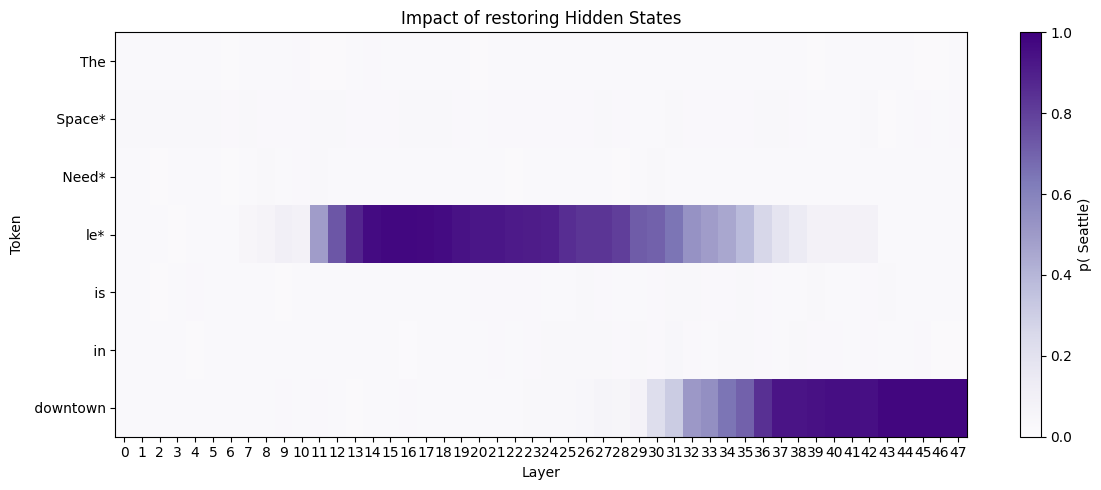

tensor([[0.1055, 0.1077, 0.1078, 0.1109, 0.1129, 0.1144, 0.1102, 0.1100, 0.1095,
         0.1130, 0.1125, 0.1074, 0.1108, 0.1117, 0.1056, 0.1083, 0.1067, 0.1086,
         0.1105, 0.1066, 0.1117, 0.1097, 0.1064, 0.1078, 0.1067, 0.1027, 0.1089,
         0.1190, 0.1064, 0.1115, 0.1082, 0.1134, 0.1099, 0.1104, 0.1121, 0.1097,
         0.1138, 0.1057, 0.1117, 0.1103, 0.1104, 0.1087, 0.1067, 0.1076, 0.1320,
         0.1133, 0.1046, 0.1091],
        [0.1189, 0.1207, 0.1217, 0.1204, 0.1194, 0.1183, 0.1181, 0.1205, 0.1170,
         0.1182, 0.1171, 0.1220, 0.1200, 0.1219, 0.1179, 0.1161, 0.1161, 0.1193,
         0.1239, 0.1184, 0.1138, 0.1224, 0.1197, 0.1145, 0.1246, 0.1173, 0.1134,
         0.1156, 0.1175, 0.1196, 0.1150, 0.1122, 0.1107, 0.1171, 0.1098, 0.1176,
         0.1049, 0.1131, 0.1292, 0.1081, 0.1119, 0.1105, 0.1207, 0.1094, 0.1145,
         0.1067, 0.1101, 0.1084],
        [0.1108, 0.1085, 0.1130, 0.1137, 0.1065, 0.1090, 0.1118, 0.1067, 0.1107,
         0.1151, 0.1196, 0.1174, 0.1133, 

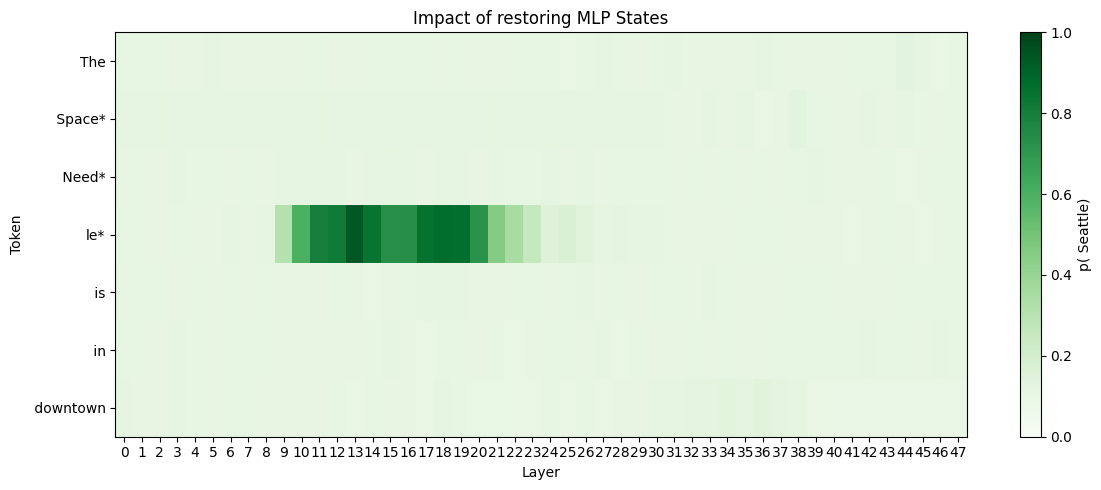

tensor([[0.1061, 0.1060, 0.1090, 0.1097, 0.1094, 0.1067, 0.1105, 0.1174, 0.1076,
         0.1091, 0.1157, 0.1057, 0.1067, 0.1058, 0.1178, 0.1094, 0.1118, 0.1095,
         0.1082, 0.1100, 0.1178, 0.1173, 0.1090, 0.1138, 0.1072, 0.1077, 0.1092,
         0.1073, 0.1109, 0.1111, 0.1119, 0.1155, 0.1114, 0.1108, 0.1083, 0.1052,
         0.1061, 0.1056, 0.1088, 0.1098, 0.1057, 0.1083, 0.1076, 0.1096, 0.1053,
         0.1079, 0.1071, 0.1083],
        [0.1209, 0.1350, 0.1297, 0.1377, 0.1279, 0.1263, 0.1292, 0.1274, 0.1137,
         0.1096, 0.1090, 0.1158, 0.1054, 0.1185, 0.1093, 0.1067, 0.1066, 0.1180,
         0.1154, 0.1099, 0.1104, 0.1135, 0.1063, 0.1165, 0.1140, 0.1066, 0.1102,
         0.1091, 0.1063, 0.1106, 0.1062, 0.1111, 0.1104, 0.1080, 0.1112, 0.1170,
         0.1119, 0.1080, 0.1122, 0.1114, 0.1069, 0.1103, 0.1071, 0.1105, 0.1103,
         0.1120, 0.1119, 0.1110],
        [0.1110, 0.1194, 0.1223, 0.1238, 0.1140, 0.1207, 0.1270, 0.1143, 0.1148,
         0.1194, 0.1163, 0.1132, 0.1097, 

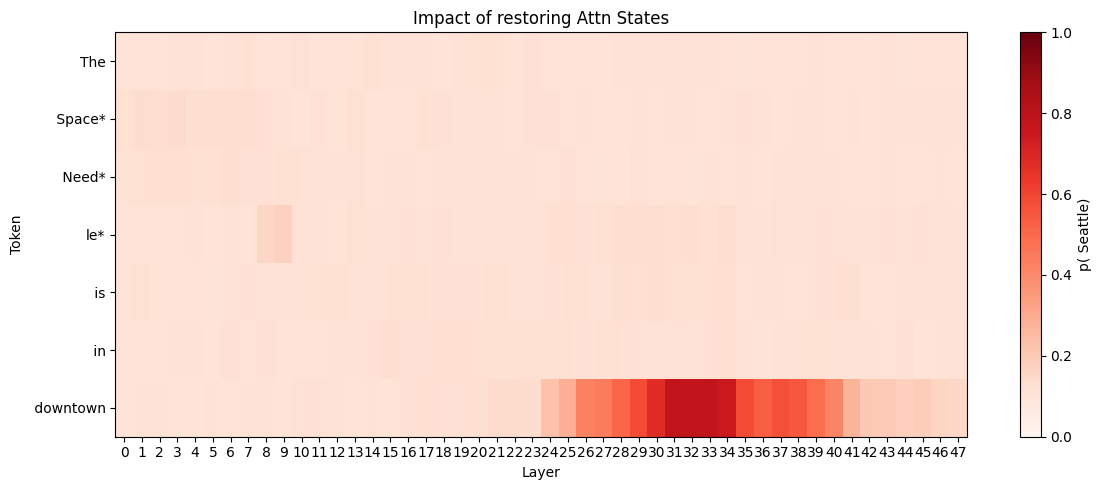

In [51]:
fact = known_facts[10]
custom_prompt = {
    "prompt": "The Space Needle is in downtown",
    "subject": "Space Needle",
}

compare_plots(custom_prompt)

In [53]:
from functools import partial

def calculate_aie_effect_part(min_prob,input_tokens,subj_index,correct_next_word, window=10, kind="resid_pre",):

    table = []
    num_layers = model.cfg.n_layers
    temp_noise_hook_fn = partial(add_noise_hook, subj_pos=subj_index)

    input_len = len(input_tokens[0])

    # Define the four key token indices
    s_tok, e_tok = subj_index
    first_subj = s_tok
    last_subj = e_tok -1
    next_token = e_tok
    last_token = input_len - 1

    # Always process these 4 tokens (even if some are duplicates or out-of-bounds)
    tokens_to_process = [first_subj, last_subj, next_token, last_token]

    for tok in tokens_to_process:
        row = []
        for center_layer in range(num_layers):
            # Build list of layers in window
            window_layers = range(
                max(0, center_layer - window // 2),
                min(num_layers, center_layer + window // 2 + 1)
            )

            # Create hook list for all layers in the window
            fwd_hooks = [(utils.get_act_name('embed'), temp_noise_hook_fn)]
            for L in window_layers:
                hook_name = ""
                if kind == "mlp":
                    hook_name = utils.get_act_name("mlp_out", L)
                elif kind == "attn":
                    hook_name = utils.get_act_name("attn_out", L)
                elif kind == "resid":
                    hook_name = utils.get_act_name("resid_pre", L)
                else:
                   raise ValueError(f"Unknown kind {kind}")
                fwd_hooks.append((
                    hook_name,
                    partial(replace_correct_activaton, token_no=tok)
                ))

            run = model.run_with_hooks(
                input_tokens,
                return_type='logits',
                fwd_hooks=fwd_hooks
            )
            logits = run[:, -1]
            logits = torch.softmax(logits, dim=1).mean(dim=0)
            score = find_correct_probability(logits, correct_next_word)
            row.append(score-min_prob)
        table.append(torch.stack(row))

    table = torch.stack(table)
    return table


In [52]:
from functools import partial

def calculate_aie_effect(fact):
    # first prompt for clean run and the rest will be corrupted ones
    prompts = [fact['prompt'] for _ in range(2)]

    input_tokens = model.to_tokens(prompts,prepend_bos=True)
    print(model.to_str_tokens(input_tokens[0]))
    subj_index = find_subject_token_range(input_tokens[0],fact['subject'])
    s_tok, e_tok = subj_index

    #Clean run to get the maximum score of prob
    clean_run = model(input_tokens,return_type='logits')
    clean_logits = clean_run[:,-1]
    clean_logits = torch.softmax(clean_logits,dim=1).mean(dim=0)
    correct_next_word,max_prob = predict_next_word(clean_logits)
    print(max_prob)

    #Corrupted run to get minimum score of prob
    temp_hook_fn = partial(add_noise_hook,subj_pos = subj_index )
    corrupted_run = model.run_with_hooks(input_tokens,return_type='logits',fwd_hooks=[(utils.get_act_name('embed'),temp_hook_fn)])
    corrupted_logits = corrupted_run[1:,-1]
    corrupted_logits = torch.softmax(corrupted_logits,dim=1).mean(dim=0)
    min_prob = find_correct_probability(corrupted_logits,correct_next_word)
    # incorrect_next_word,min_prob = predict_next_word(corrupted_logits)
    print(min_prob)

    input_len = len(input_tokens[0])

    # Define the four key token indices
    first_subj = s_tok
    last_subj = e_tok-1
    next_token = e_tok
    last_token = input_len - 1

    # Always process these 4 tokens (even if some are duplicates or out-of-bounds)
    tokens_to_process = [first_subj, last_subj, next_token, last_token]


    #Replace the activations at each (subj_token, layer) pair and store the results
    table = []
    for tok in tokens_to_process:
       temp_noise_hook_fn = partial(add_noise_hook,subj_pos = subj_index )
       temp_hook_fn = partial(replace_correct_activaton,token_no = tok)
       row =[]
       for layer in range(model.cfg.n_layers):
          run = model.run_with_hooks(input_tokens,return_type='logits',fwd_hooks=[(utils.get_act_name('embed'),temp_noise_hook_fn),(utils.get_act_name("resid_pre", layer), temp_hook_fn)])
          logits = run[1:,-1]
          logits = torch.softmax(logits,dim=1).mean(dim=0)
          score = find_correct_probability(logits,correct_next_word)
          row.append(score-min_prob)
       table.append(torch.stack(row))

    resid_table = torch.stack(table)
    mlp_table =calculate_aie_effect_part(min_prob,input_tokens,subj_index,correct_next_word,kind='mlp')
    attn_table = calculate_aie_effect_part(min_prob,input_tokens,subj_index,correct_next_word,kind='attn')
    return {
        'resid_table': resid_table,
        'mlp_table': mlp_table,
        'attn_table': attn_table,
        'max_prob': max_prob,
        'min_prob': min_prob,
        'correct_next_word': correct_next_word,
    }


In [48]:
def total_aie_effects(facts):
    resid_total = None
    mlp_total = None
    attn_total = None

    for fact in facts:
        effect = calculate_aie_effect(fact)

        # Initialize the totals with the first fact's tables
        if resid_total is None:
            resid_total = effect['resid_table'].clone()
            mlp_total = effect['mlp_table'].clone()
            attn_total = effect['attn_table'].clone()
        else:
            # Ensure that the shapes match for addition
            if (resid_total.shape != effect['resid_table'].shape or
                mlp_total.shape != effect['mlp_table'].shape or
                attn_total.shape != effect['attn_table'].shape):
                raise ValueError("Table shapes do not match across facts; cannot sum.")

            resid_total += effect['resid_table']
            mlp_total += effect['mlp_table']
            attn_total += effect['attn_table']

    if resid_total is not None:
        resid_total /= len(facts)
        mlp_total /= len(facts)
        attn_total /=len(facts)

    return {
        'resid_table': resid_total,
        'mlp_table': mlp_total,
        'attn_table': attn_total,
    }

In [35]:
import matplotlib.pyplot as plt

def plot_aie_heatmap(matrix,color=None,title=None):
    if color is None:
        color = "Purples"

    y_labels = ['First Subject', 'Last Subject', 'Next Token', 'Last Token']

    plt.figure(figsize=(12, 5))
    plt.imshow(matrix, aspect='auto', cmap=color,vmin=0,vmax=0.2)
    plt.colorbar(label=f'AIE')
    plt.yticks(range(len(y_labels)), y_labels)
    plt.xticks(range(matrix.shape[1]), list(range(matrix.shape[1])))
    if title:
        plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel("Token")
    plt.tight_layout()
    plt.show()

In [56]:
def plot_aie_effect(facts):
  result = total_aie_effects(facts)
  scores = result['resid_table'].detach().cpu()
  print(scores)
  plot_aie_heatmap(scores)

  scores = result['mlp_table'].detach().cpu()
  print(scores)
  plot_aie_heatmap(scores)


  scores = result['attn_table'].detach().cpu()
  print(scores)
  plot_aie_heatmap(scores)

In [76]:
facts = known_facts[:1]
len(facts)

100

['<|endoftext|>', 'V', 'inson', ' Mass', 'if', ' is', ' located', ' in', ' the', ' continent', ' of']
0.033086005598306656
tensor(0.0454, device='cuda:0')
['<|endoftext|>', 'Be', 'ats', ' Music', ' is', ' owned', ' by']
0.6755929589271545
tensor(0.0011, device='cuda:0')
['<|endoftext|>', 'Aud', 'ible', '.', 'com', ' is', ' owned', ' by']
0.370822012424469
tensor(0.0008, device='cuda:0')
['<|endoftext|>', 'The', ' Big', ' Bang', ' Theory', ' premie', 'res', ' on']
0.3075277805328369
tensor(0.0152, device='cuda:0')
['<|endoftext|>', 'Mac', 'App', ',', ' a', ' product', ' created', ' by']
0.5270336866378784
tensor(0.0044, device='cuda:0')
['<|endoftext|>', 'Gi', 'use', 'ppe', ' Angel', 'i', ',', ' who', ' has', ' a', ' citizenship', ' of']
0.26238811016082764
tensor(0.0050, device='cuda:0')
['<|endoftext|>', 'Catal', 'onia', ' belongs', ' to', ' the', ' continent', ' of']
0.855056643486023
tensor(0.0947, device='cuda:0')
['<|endoftext|>', 'In', ' Marshall', ' Islands', ',', ' the', ' lang

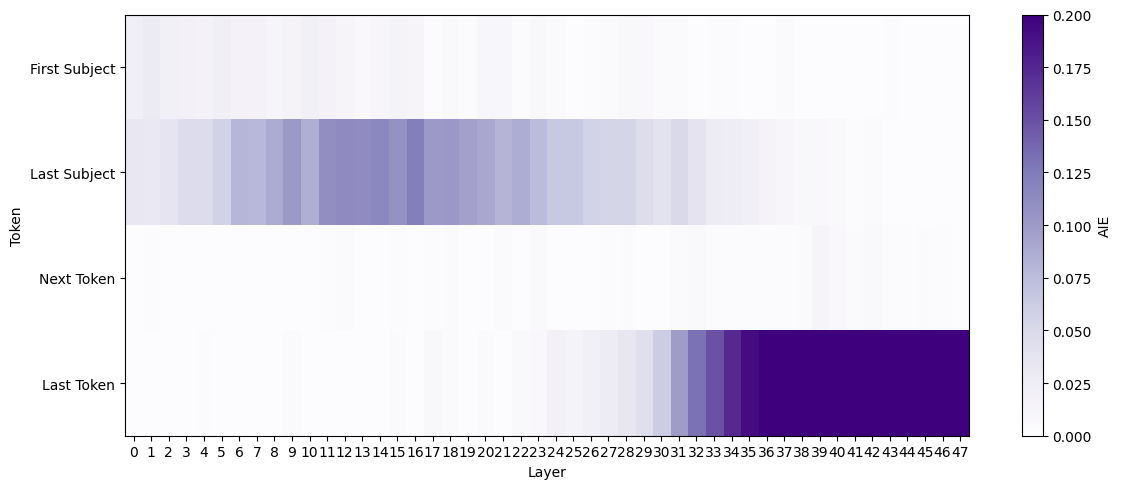

tensor([[0.1692, 0.1630, 0.1675, 0.1642, 0.1673, 0.1656, 0.1690, 0.1639, 0.1609,
         0.1661, 0.1606, 0.1620, 0.1599, 0.1604, 0.1609, 0.1559, 0.1568, 0.1588,
         0.1578, 0.1545, 0.1593, 0.1606, 0.1592, 0.1581, 0.1596, 0.1583, 0.1601,
         0.1562, 0.1588, 0.1575, 0.1565, 0.1560, 0.1552, 0.1556, 0.1568, 0.1560,
         0.1554, 0.1548, 0.1570, 0.1558, 0.1549, 0.1534, 0.1579, 0.1563, 0.1543,
         0.1570, 0.1561, 0.1543],
        [0.1769, 0.1780, 0.1776, 0.1788, 0.1796, 0.1811, 0.1740, 0.1755, 0.1719,
         0.1802, 0.1776, 0.1764, 0.1886, 0.1814, 0.1798, 0.1848, 0.1795, 0.1803,
         0.1807, 0.1704, 0.1707, 0.1657, 0.1631, 0.1611, 0.1603, 0.1597, 0.1593,
         0.1574, 0.1606, 0.1562, 0.1566, 0.1557, 0.1560, 0.1562, 0.1549, 0.1548,
         0.1575, 0.1573, 0.1550, 0.1542, 0.1538, 0.1541, 0.1558, 0.1559, 0.1560,
         0.1551, 0.1570, 0.1547],
        [0.1562, 0.1526, 0.1549, 0.1527, 0.1545, 0.1532, 0.1553, 0.1540, 0.1551,
         0.1564, 0.1532, 0.1544, 0.1556, 

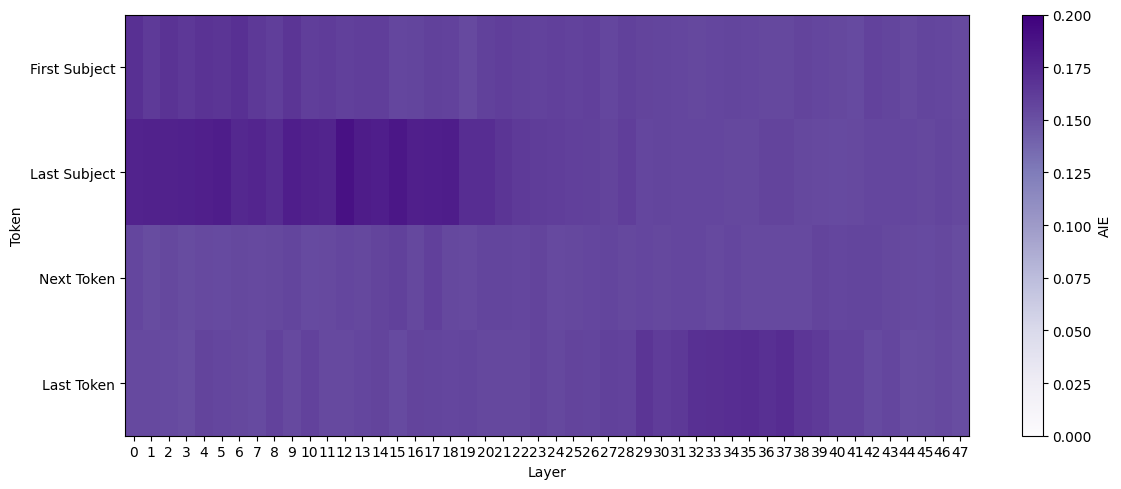

tensor([[0.1550, 0.1572, 0.1552, 0.1561, 0.1542, 0.1546, 0.1522, 0.1534, 0.1532,
         0.1562, 0.1540, 0.1539, 0.1548, 0.1582, 0.1563, 0.1573, 0.1565, 0.1546,
         0.1555, 0.1544, 0.1562, 0.1529, 0.1558, 0.1580, 0.1558, 0.1562, 0.1568,
         0.1579, 0.1569, 0.1572, 0.1562, 0.1562, 0.1567, 0.1590, 0.1548, 0.1553,
         0.1546, 0.1544, 0.1547, 0.1550, 0.1540, 0.1579, 0.1560, 0.1546, 0.1561,
         0.1565, 0.1553, 0.1562],
        [0.1598, 0.1608, 0.1594, 0.1591, 0.1645, 0.1586, 0.1561, 0.1595, 0.1608,
         0.1581, 0.1557, 0.1554, 0.1561, 0.1556, 0.1547, 0.1564, 0.1554, 0.1568,
         0.1589, 0.1562, 0.1546, 0.1605, 0.1595, 0.1586, 0.1604, 0.1613, 0.1594,
         0.1579, 0.1600, 0.1578, 0.1580, 0.1583, 0.1546, 0.1561, 0.1569, 0.1571,
         0.1564, 0.1555, 0.1576, 0.1554, 0.1556, 0.1548, 0.1552, 0.1562, 0.1561,
         0.1560, 0.1547, 0.1567],
        [0.1559, 0.1538, 0.1549, 0.1568, 0.1563, 0.1542, 0.1545, 0.1564, 0.1549,
         0.1557, 0.1553, 0.1545, 0.1554, 

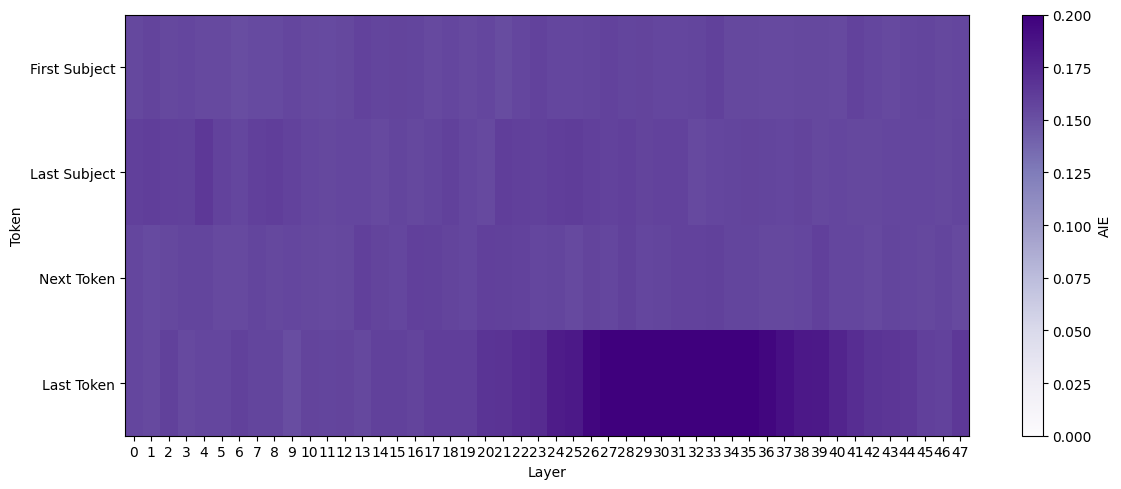

In [77]:
plot_aie_effect(facts)